In [10]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [19]:
# Set display options
pd.set_option('display.max_columns', None)

metadata_path = "C:/Users/hazal/Downloads/archive/metadata.csv"
df = pd.read_csv(metadata_path)

print("Total records:", len(df))
df.head()

C:\Users\hazal\AppData\Local\Temp\ipykernel_36468\830971718.py:5: DtypeWarning: Columns (1,4,5,6,13,14,15,16) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(metadata_path)


Total records: 1056660


,cord_uid,sha,source_x,title,doi,pmcid,pubmed_id,license,abstract,publish_time,authors,journal,mag_id,who_covidence_id,arxiv_id,pdf_json_files,pmc_json_files,url,s2_id
0,ug7v899j,d1aafb70c066a2068b02786f8929fd9c900897fb,PMC,Clinical features of culture-proven Mycoplasma...,10.1186/1471-2334-1-6,PMC35282,11472636,no-cc,OBJECTIVE: This retrospective chart review des...,2001-07-04,"Madani, Tariq A; Al-Ghamdi, Aisha A",BMC Infect Dis,NaN,NaN,NaN,document_parses/pdf_json/d1aafb70c066a2068b027...,document_parses/pmc_json/PMC35282.xml.json,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3...,NaN
1,02tnwd4m,6b0567729c2143a66d737eb0a2f63f2dce2e5a7d,PMC,Nitric oxide: a pro-inflammatory mediator in l...,10.1186/rr14,PMC59543,11667967,no-cc,Inflammatory diseases of the respiratory tract...,2000-08-15,"Vliet, Albert van der; Eiserich, Jason P; Cros...",Respir Res,NaN,NaN,NaN,document_parses/pdf_json/6b0567729c2143a66d737...,document_parses/pmc_json/PMC59543.xml.json,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5...,NaN
2,ejv2xln0,06ced00a5fc04215949aa72528f2eeaae1d58927,PMC,Surfactant protein-D and pulmonary host defense,10.1186/rr19,PMC59549,11667972,no-cc,Surfactant protein-D (SP-D) participates in th...,2000-08-25,"Crouch, Erika C",Respir Res,NaN,NaN,NaN,document_parses/pdf_json/06ced00a5fc04215949aa...,document_parses/pmc_json/PMC59549.xml.json,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5...,NaN
3,2b73a28n,348055649b6b8cf2b9a376498df9bf41f7123605,PMC,Role of endothelin-1 in lung disease,10.1186/rr44,PMC59574,11686871,no-cc,Endothelin-1 (ET-1) is a 21 amino acid peptide...,2001-02-22,"Fagan, Karen A; McMurtry, Ivan F; Rodman, David M",Respir Res,NaN,NaN,NaN,document_parses/pdf_json/348055649b6b8cf2b9a37...,document_parses/pmc_json/PMC59574.xml.json,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5...,NaN
4,9785vg6d,5f48792a5fa08bed9f56016f4981ae2ca6031b32,PMC,Gene expression in epithelial cells in respons...,10.1186/rr61,PMC59580,11686888,no-cc,Respiratory syncytial virus (RSV) and pneumoni...,2001-05-11,"Domachowske, Joseph B; Bonville, Cynthia A; Ro...",Respir Res,NaN,NaN,NaN,document_parses/pdf_json/5f48792a5fa08bed9f560...,document_parses/pmc_json/PMC59580.xml.json,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5...,NaN


In [ ]:
metadata_path = "C:/Users/hazal/Downloads/archive/metadata.csv"
df = pd.read_csv(metadata_path)

df.head(5)

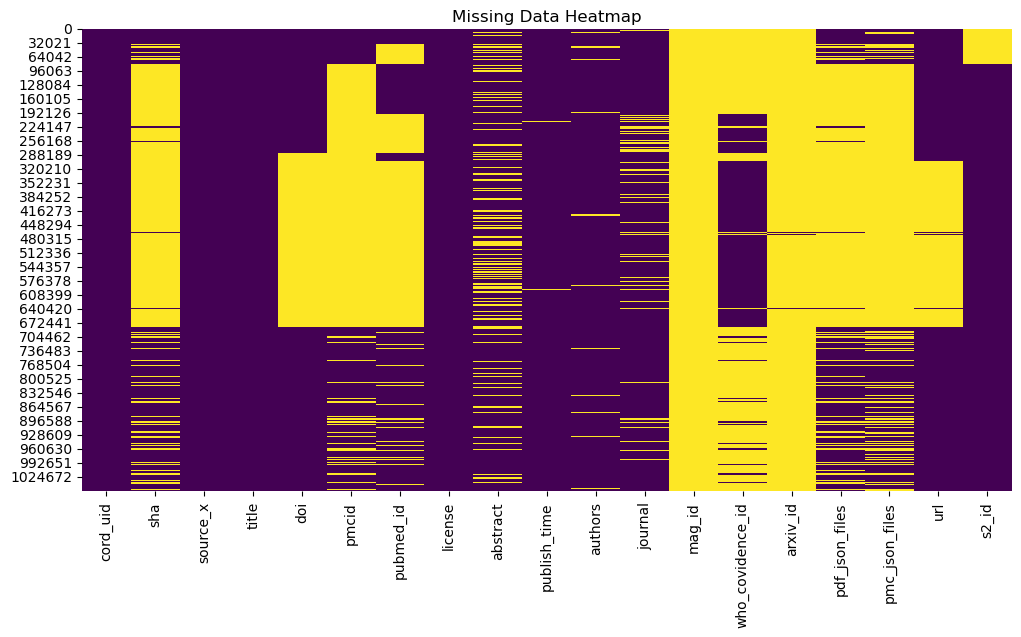

In [5]:
# 3. Missing values ısı haritası
plt.figure(figsize=(12, 6))
sns.heatmap(df.isnull(), cbar=False, cmap="viridis")
plt.title("Missing Data Heatmap")
plt.show()

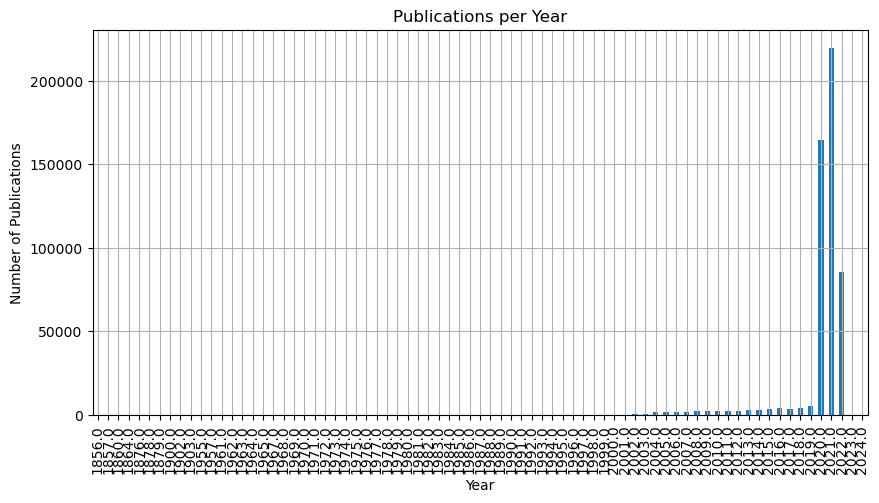

In [6]:
# 4. Yearly distribution of publications
publish_year = pd.to_datetime(df['publish_time'], errors='coerce').dt.year
year_counts = publish_year.value_counts().sort_index()
year_counts.plot(kind='bar', figsize=(10,5), title='Publications per Year')
plt.xlabel('Year')
plt.ylabel('Number of Publications')
plt.grid(True)
plt.show()

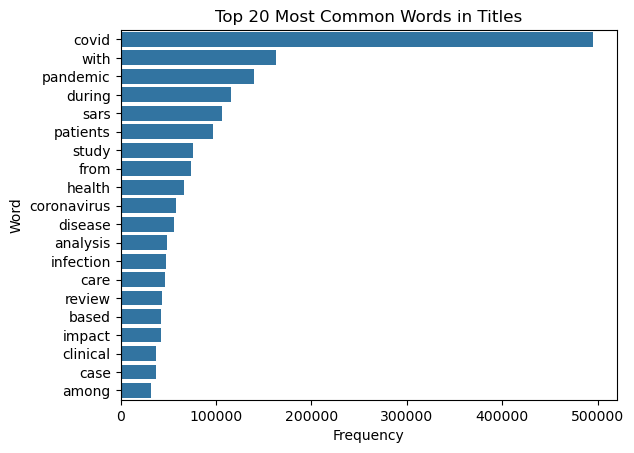

In [7]:
# 7. Anahtar kelime analizi: Başlıklarda en sık kullanılan kelimeler
from collections import Counter
import re

all_titles = df['title'].dropna().tolist()
words = [word.lower() for title in all_titles for word in re.findall(r'\b\w{4,}\b', title)]
word_counts = Counter(words).most_common(20)

words_df = pd.DataFrame(word_counts, columns=['Word', 'Frequency'])
sns.barplot(data=words_df, x='Frequency', y='Word')
plt.title('Top 20 Most Common Words in Titles')
plt.show()


In [8]:
# 8. COVID ile ilgili makale yüzdesi
title_contains_covid = df['title'].dropna().str.contains("covid|corona|sars-cov", case=False)
print("COVID-related publications:", title_contains_covid.sum())
print("Total publications:", len(df))
print("Percentage:", round(title_contains_covid.sum() / len(df) * 100, 2), "%")


COVID-related publications: 606678
Total publications: 1056660
Percentage: 57.41 %


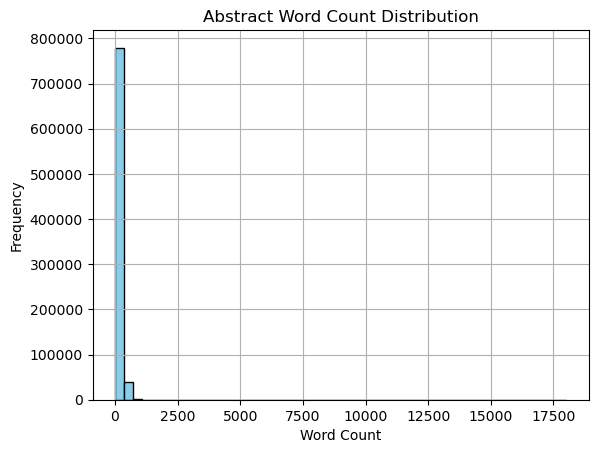

In [9]:
# 9. Özet kelime sayısı dağılımı
abstract_lengths = df['abstract'].dropna().apply(lambda x: len(x.split()))
plt.hist(abstract_lengths, bins=50, color='skyblue', edgecolor='black')
plt.title('Abstract Word Count Distribution')
plt.xlabel('Word Count')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()
